### Финальный проект: Банки - Анализ оттока клиентов

### Задача**:**

Проанализируйте клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.

### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Ссылка на презентацию: https://disk.yandex.ru/i/C3mRMrBkOJ3GcQ

<div class='alert alert-warning'>⚠️
В презентации содержится базовая информация по изученным данным. Здорово что использовал дополнительные графические элементы, это облегчает восприятие информации. Но в презентации присутствует перекос в сторону текстовой информации, не хватает графиков для наглядной визуализации. 

<div class='alert alert-success'>👍
Спасибо за правки, так получилось более наглядно представить информацию. В будущем стоит обращать внимание на подписи отметок на графиках. Не должно быть лишних отметок для категориальных признаков, а также лучше делать пометку со значением 0/1 для бинарных признаков.

<span style="color:blue"> **Заменил презентацию, добавил визуализации, прикрепил ссылку на дашборд**

### Ссылка на дашборд: https://u.to/l8kRHA

<div class='alert alert-success'>👍
Дашборд принят, все критерии соблюдены!

### 1. Загрузка данных

**1.1 Импорт библиотек**

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

<div class='alert alert-success'>👍
Отличное начало, очень круто что владеешь настройкой параметров отображения таблиц пандаса! Выглядит профессионально.


**1.2 Загрузка данных и изучение основной информации**

Загрузим датасет и посмотрим на него:

In [54]:
data = pd.read_csv('/datasets/bank_dataset.csv')
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


<div class='alert alert-danger'>⛔️
Данные должны открываться c сервера для воспроизводимости вычислений, данные лежат в папке datasets/


<span style="color:blue"> **Поправил (делал работу на локальном компьютере, поэтому был указан другой путь к файлу)**

Рассмотрим основную информацию о датасете:

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Вывод:**<br>
1. В датасете 10000 строк<br>
2. Типы данных корректны<br>
3. В столбце Balance (остаток денежных средств на счете) 3617 пропусков (NaN) - что составляет 36,17 % от общего числа.<br>

### 2. Предобработка данных

**Подготовим предоставленные данные к дальнейшему анализу**

**Приведем названия столбцов к нижнему регистру и переименуем для дальнейшего удобства:**

In [56]:
data.columns = data.columns.str.lower()
data = data.rename(columns = {'userid':'user_id','creditcard':'credit_card'})
data

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


**Проверим дубликаты, а также количество уникальных пользователей из имеющихся 10000 строк:**

In [57]:
print('Обнаружено дубликатов:', data.duplicated().sum())
print('Количество уникальных пользователей:',len(data['user_id'].unique()))

Обнаружено дубликатов: 0
Количество уникальных пользователей: 10000


**Обработка пропусков в столбце Balance:**

In [58]:
print('Min значение Balance:',data['balance'].min())
print('Max значение Balance:', data['balance'].max())

Min значение Balance: 3768.69
Max значение Balance: 250898.09


<div class='alert alert-danger'>⛔️
Прежде чем выдвигать какие-то гипотезы необходимо проделать исследовательскую работу в этом направлении. Попробуй посмотреть на число пропусков в разрезах различных признаков. 

<span style="color:blue">**UPD: Рассмотрим подробнее пропуски в столбце Balance:**

**Рассмотрим таблицу клиентов с пропущенными значениями подробнее:**

In [65]:
data_nan = data[data['balance']==0]
display(data_nan)
data_nan.info()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,0.00,2,1,1,"10,062.80",0
11,15779909,497,Рыбинск,М,24,3,0.00,2,1,0,"76,390.01",0
12,15675000,476,Ярославль,Ж,34,10,0.00,2,1,0,"26,260.98",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,0.00,2,1,1,"179,436.60",0
9992,15699841,726,Рыбинск,М,36,2,0.00,1,1,0,"195,192.40",0
9994,15762030,800,Ярославль,Ж,29,2,0.00,2,0,0,"167,773.55",0
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,"96,270.64",0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 9997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           3617 non-null   int64  
 1   score             3617 non-null   int64  
 2   city              3617 non-null   object 
 3   gender            3617 non-null   object 
 4   age               3617 non-null   int64  
 5   objects           3617 non-null   int64  
 6   balance           3617 non-null   float64
 7   products          3617 non-null   int64  
 8   credit_card       3617 non-null   int64  
 9   loyalty           3617 non-null   int64  
 10  estimated_salary  3617 non-null   float64
 11  churn             3617 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 367.4+ KB


In [66]:
data_nan.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"3,617.00","3,617.00","3,617.00","3,617.00","3,617.00","3,617.00","3,617.00","3,617.00","3,617.00","3,617.00"
mean,"15,734,685.59",649.45,38.43,5.07,0.00,1.78,0.72,0.52,"98,983.56",0.14
std,"71,947.49",96.16,10.49,2.86,0.00,0.50,0.45,0.50,"57,730.83",0.35
min,"15,608,442.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,90.07,0.00
25%,"15,672,255.00",583.00,31.00,3.00,0.00,1.00,0.00,0.00,"49,506.82",0.00
50%,"15,736,083.00",651.00,37.00,5.00,0.00,2.00,1.00,1.00,"98,618.79",0.00
75%,"15,796,286.00",717.00,43.00,7.00,0.00,2.00,1.00,1.00,"148,330.97",0.00
max,"15,858,100.00",850.00,88.00,10.00,0.00,4.00,1.00,1.00,"199,992.48",1.00


In [67]:
for column in ['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn']:
    display ("----%s----" %column)
    display (data_nan[column].value_counts())

'----city----'

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

'----gender----'

М    1963
Ж    1654
Name: gender, dtype: int64

'----products----'

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

'----credit_card----'

1    2592
0    1025
Name: credit_card, dtype: int64

'----loyalty----'

1    1873
0    1744
Name: loyalty, dtype: int64

'----churn----'

0    3117
1     500
Name: churn, dtype: int64

Рассмотрим процент пропущенных значений в разрезе значений категориальных параметров:

In [81]:
for column in ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty', 'churn']:
    display ("----%s----" %column)
    display ((data_nan[column].value_counts() / data[column].value_counts())*100)

'----city----'

Ростов Великий     NaN
Рыбинск          48.41
Ярославль        48.22
Name: city, dtype: float64

'----gender----'

1   35.97
0   36.41
Name: gender, dtype: float64

'----objects----'

0    33.17
1    33.72
2    36.45
3    34.89
4    37.31
5    36.96
6    37.95
7    37.55
8    35.41
9    36.59
10   36.33
Name: objects, dtype: float64

'----products----'

1   17.80
2   56.64
3   36.84
4   23.33
Name: products, dtype: float64

'----credit_card----'

1   36.74
0   34.80
Name: credit_card, dtype: float64

'----loyalty----'

1   36.36
0   35.97
Name: loyalty, dtype: float64

'----churn----'

0   39.14
1   24.55
Name: churn, dtype: float64

**Вывод** по клиентам с пропущенными значениями в поле Balance:<br>
- Ростов Великий не представлен среди таковых клиентов, в Рыбинске и Ярославле почти половина клиентов с пропусками;<br>
- В большинстве параметров пропуски составляют 30-40%;<br>
- Среди тех, кто пользуется одним продуктом, наиболее полные данные - пропуски в Balance составляют 17,8%, больше всего пропусков среди тех, у кого 2 продукта;<br>
- Мужчины также преобладают - 54%;<br>
- 71% пользуются двумя продуктами Банка, 25% - одним;<br>
- 71% пользуются кредитной карточкой;<br>
- 51% активных пользователей;<br>
- отток среди пользователей с нулевым балансом составляет 13,82%;<br>
- средняя заработная плата - 98,983.56 руб.;<br>
- средний возраст - 38 лет<br>

Т.к. пропуски составляют 36% - удалить их будет нецелесообразно.<br>
Возможные причины пропусков:<br>
- Некорректная выгрузка из БД: возможно под пропусками подразумевается нулевой баланс, особенно учитывая, что таковых значений нет;<br>
- Использование только кредитных продуктов Банка<br>

Скорее всего пропуски - это нулевой баланс (т.к. сложно подобрать причины, почему выгрузка не смогла отразить значения от 0 до 3,768.69 руб., если это не нулевые значения) либо отсутствие дебетовой карты, 

Предположение, что пропуски в балансе связаны с пользованием только кредитных продуктов Банка имеет место быть, учитывая, что 71% клиентов имеют кредитку, а также более низкий уровень оттока (т.к. возможно связаны долгосрочными долговыми обязательствами) - т.е. это те, у кого кредитная карточка, потребительский кредит, ипотека, либо просто нет денег на балансе (вывели, потратили и т.д.)<br>
**Заменим пропуски на "0".**<br>

<div class='alert alert-success'>👍
Можно сделать предположение о том, что клиентов в Ростове привлекли за счет зарплатного проекта заключив договор с какой-то организацией.


In [59]:
data['balance'].replace(np.nan, 0, inplace=True)
display(data)
data.info()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**ВЫВОД:**

- привели названия столбцов к нижнему регистру;<Br>
- скорректировали названия столбцов;<Br>
- дубликатов не обнаружено;<Br>
- все 10000 строк - это уникальные, не повторяющиеся клиенты;<Br>
- все данные, за исключением отсутствия нулевого баланса и необычайно низкой заработной платы являются нормальными, никаких аномалий не наблюдается;<Br>
- заменили пропуски в столбце Balance на "0" - на основании предположения о том, что это ошибка при выгрузке из БД, которая подразумевает нулевой остаток на балансе, либо использвание клиентами только кредитных продуктов Банка<Br>

### 3. Исследовательский анализ данных

**3.1 Анализ общих данных без разбивки по оттоку:**

Применим метод describe() и рассмотрим статистику по столбцам:

In [60]:
data.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Рассмотрим подробнее категориальные признаки, применим к ним функцию value_counts():

In [61]:
for column in ['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn']:
    display ("----%s----" %column)
    display (data[column].value_counts())

'----city----'

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

'----gender----'

М    5457
Ж    4543
Name: gender, dtype: int64

'----products----'

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

'----credit_card----'

1    7055
0    2945
Name: credit_card, dtype: int64

'----loyalty----'

1    5151
0    4849
Name: loyalty, dtype: int64

'----churn----'

0    7963
1    2037
Name: churn, dtype: int64

Выводы:<br>
- Больше половины клиентов из Ярославля - 5014 клиентов, второй - Ростов Великий (2509), третий - Рыбинск (2477);<br>
- Мужчины преобладают - их 54,57%;<br>
- Активные и не активные клиенты распределны почти поровну - 5151 и 4849 соответственно;<br>
- Клиенты, попавшие в отток составляют 20,37% от общего числа;<br>
- Исходя из того, что минимальный скоринговый балл - 350, а максимальный - 850, применяется система скоринга FICO (применяется в НБКИ), которая принмает значения от 300 до 850 баллов. В наших данных среднее и медианное значение почти одинаково - 650 баллов, которого, как считается, достаточно для одобрения кредита;<br>
- Средний возраст - почти 39 лет (38,92), медианный - 44 года;<br>
- Максимальное количетсво объектов в собственности среди клиентов - 10, среднее и медианное - 5 объектов;<br>
- Средняя сумма баланса - 119827,49 руб. Минимальная сумма на балансе - 3768,69 руб., максимальная - 250898,09 руб. Нет пользователей с нулевым балансом;<br>
- В большинстве пользователи пользуются одним-двумя продуктами Банка, 3 и 4 продукта на клиента - редкое явление (266 и 60 клиентов соответственно);<br>
- 70,55% клиентов имеют кредитную карту;<br>
- Средняя зарплата - 100090,24 руб (медианная - 100193,91 руб.) - что является довольно хорошим показателем.<br>
- Больше всего вопросов вызывает минимальная зарплата - 11,58 руб. Отсюда появляются вопросы - каким образом собираются данные по зарплате клиентов.<br>

Все данные, за исключением отсутствия нулевого баланса и необычайно низкой заработной платы являются нормальными, никаких аномалий не наблюдается.<br>

**Рассмотрим более подробно клиентов с низкой зарплатой (возьмем данные с уровнем зарплаты ниже официального уровня МРОТ):**

In [62]:
data_mrot = data[data['estimated_salary'] < 12792]
display(data_mrot)
data_mrot.info()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
6,15635267,822,Ярославль,М,50,7,0.00,2,1,1,"10,062.80",0
16,15780188,653,Ростов Великий,М,58,1,"132,602.88",1,1,0,"5,097.67",1
23,15768473,669,Ярославль,М,46,3,0.00,2,0,1,"8,487.75",0
58,15666680,511,Рыбинск,Ж,66,4,0.00,1,1,0,"1,643.11",1
84,15781487,493,Ярославль,Ж,46,4,0.00,2,1,0,"1,907.66",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9940,15834708,748,Ярославль,Ж,20,7,0.00,2,0,0,"10,792.42",0
9943,15702231,784,Рыбинск,М,23,2,0.00,1,1,1,"6,847.73",0
9954,15782586,645,Ярославль,М,45,6,"155,417.61",1,0,1,"3,449.22",0
9979,15735400,677,Ярославль,Ж,58,1,"90,022.85",1,0,1,"2,988.28",0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 6 to 9987
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           640 non-null    int64  
 1   score             640 non-null    int64  
 2   city              640 non-null    object 
 3   gender            640 non-null    object 
 4   age               640 non-null    int64  
 5   objects           640 non-null    int64  
 6   balance           640 non-null    float64
 7   products          640 non-null    int64  
 8   credit_card       640 non-null    int64  
 9   loyalty           640 non-null    int64  
 10  estimated_salary  640 non-null    float64
 11  churn             640 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 65.0+ KB


In [63]:
data_mrot.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00
mean,"15,732,565.08",644.55,38.51,4.83,"69,423.46",1.55,0.67,0.52,"6,276.61",0.19
std,"71,797.97",99.84,10.44,2.85,"61,983.42",0.58,0.47,0.50,"3,714.44",0.39
min,"15,608,947.00",412.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,673,556.00",577.75,31.00,2.00,0.00,1.00,0.00,0.00,"3,153.49",0.00
50%,"15,731,724.00",645.00,37.00,5.00,"89,429.10",2.00,1.00,1.00,"6,121.99",0.00
75%,"15,792,972.00",710.00,43.00,7.00,"121,816.54",2.00,1.00,1.00,"9,554.05",0.00
max,"15,858,164.00",850.00,77.00,10.00,"204,510.94",4.00,1.00,1.00,"12,766.74",1.00


In [64]:
for column in ['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn']:
    display ("----%s----" %column)
    display (data_mrot[column].value_counts())

'----city----'

Ярославль         319
Рыбинск           164
Ростов Великий    157
Name: city, dtype: int64

'----gender----'

М    347
Ж    293
Name: gender, dtype: int64

'----products----'

1    315
2    304
3     18
4      3
Name: products, dtype: int64

'----credit_card----'

1    426
0    214
Name: credit_card, dtype: int64

'----loyalty----'

1    330
0    310
Name: loyalty, dtype: int64

'----churn----'

0    517
1    123
Name: churn, dtype: int64

У 263 клиентов из 640, с зарплатой ниже МРОТ, пропущенные значения в столбце Balance (41%).

Вывод по клиентам с уровнем зарплаты ниже МРОТ:<br>

- данных клиентов в Ярославле (319) столько же, сколько в Рыбинске и Ростове Великом вместе взятых (164 и 157 соответственно);<br>
- преобладают Мужчины - 347 против 293;<br>
- активных и не активных клиентов практически поровну (330 и 310 соответственно);<br>
- большинство пользуются кредитной картой - 426 человек, 214 - нет;<br>
- большинство данных клиентов не попали в отток - таковых всего 123 против 517 действующих (19%);<br>
- среднее значение зарплаты - 6276,61 руб (медиана - 6121,99 руб.), но в то же время по остальным параметрам (таким как баланс счета, количество объектов в собственности, возраст и т.д.) они практически не отличаются от остальных клиентов (у кого зарплата выше МРОТ).<br>

Есть смысл в будущем уточнить у тех, кто предоставлял данные, как и на основании чего выгружаются данные в поле заработной платы и насколько актуален данный параметр (т.е. данные о з/п это данные, указанные в анкете (например, при получении кредитного продукта), либо фактические поступления з/п за определенный промежуток времени или средние значения, относятся ли к ней социальные выплаты, декретные и т.д.), т.к. есть значения меньше МРОТ (и меньше 1000 руб.) при практически идентичных значениях остальных параметров - таких как баллы кредитного скоринга, количество объектов в собственности, остаток на балансе и т.д.;<Br>

**3.2 Анализ средних и медианных значений в двух группах - тех, кто ушел, и тех, кто остался:**

Для начала заменим значения столбца Пол с "М" и "Ж" на числовые, чтобы отобразить средние значения:

In [68]:
data['gender'] = data['gender'].replace({'Ж':0, 'М': 1})

Рассмотрим средние значения двух групп:

In [69]:
data.groupby('churn').agg('mean').T

churn,0,1
user_id,"15,733,903.88","15,732,787.96"
score,651.85,645.35
gender,0.57,0.44
age,37.41,44.84
objects,5.03,4.93
balance,"72,745.30","91,108.54"
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"99,738.39","101,465.68"


Рассмотрим медианные значения двух групп:

In [70]:
data.groupby('churn').agg('median').T

churn,0,1
user_id,"15,734,279.00","15,731,699.00"
score,653.00,646.00
gender,1.00,0.00
age,36.00,45.00
objects,5.00,5.00
balance,"92,072.68","109,349.29"
products,2.00,1.00
credit_card,1.00,1.00
loyalty,1.00,0.00
estimated_salary,"99,645.04","102,460.84"


Отличительные черты клиентов, попавших в отток:<br>
- Чуть меньше средний балл кредитного скоринга - 645 против 651 (медианные значения - 646 против 653);<br>
- Преобладает женский пол;<br>
- Старше в среднем на 7 лет (по медиане - разница в 9 лет);<br>
- Средний баланс покинувших Банк клиентов больше на 18363,24 руб. (по медиане - на 17276,61 руб);<br>
- Активность ниже - 0.36 против 0.55 у оставшихся клиентов, т.е. по их счетам реже проводятся транзакции;<br>
- Средняя зарплата выше на 1727,29 руб(по медиане - на 2815,80 руб).<br>

По остальным критериям обе группы схожи - по количеству объектов в собственности, количеству используемых банковских продуктов, большинство имеет кредитную карточку.<br>

**3.3 Визуализация данных двух групп - тех, кто ушел, и тех, кто остался:**

Разделим данные на категориальные и количественные:

**Рассмотрим количественные признаки:**

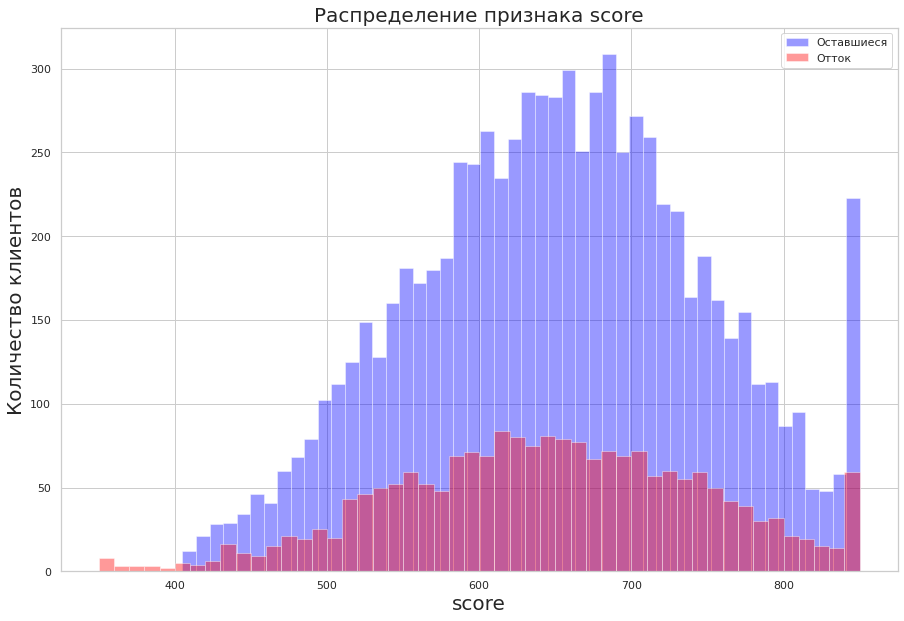

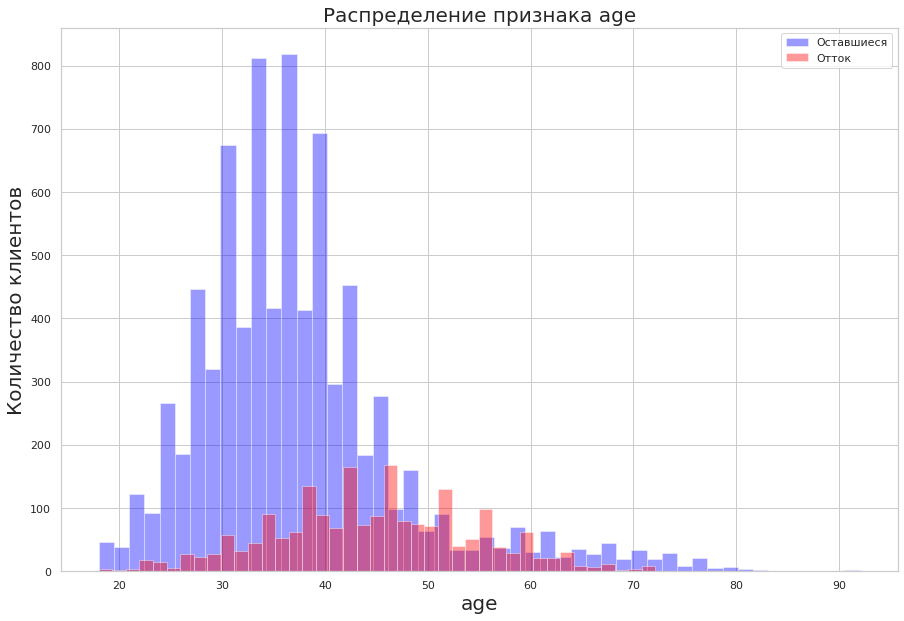

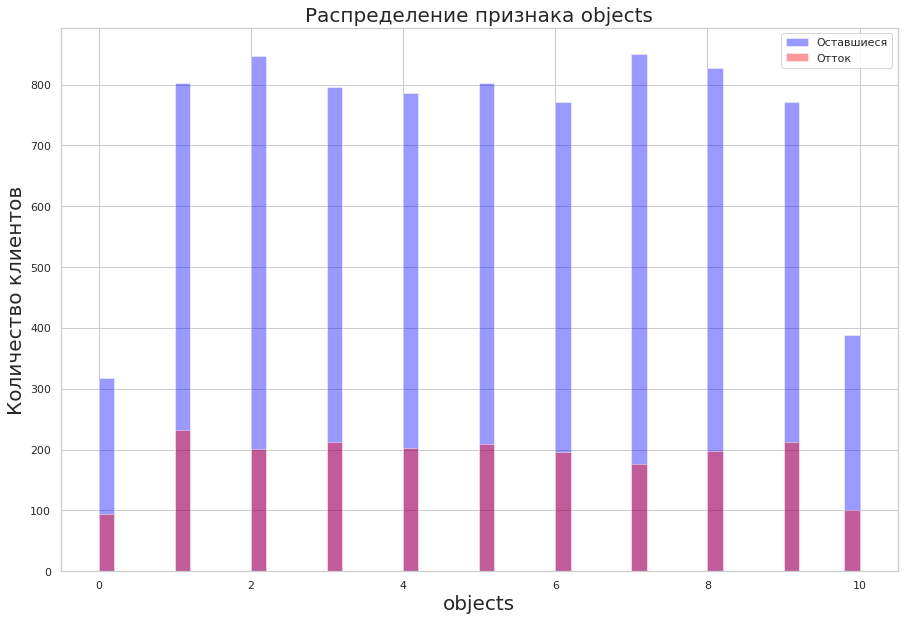

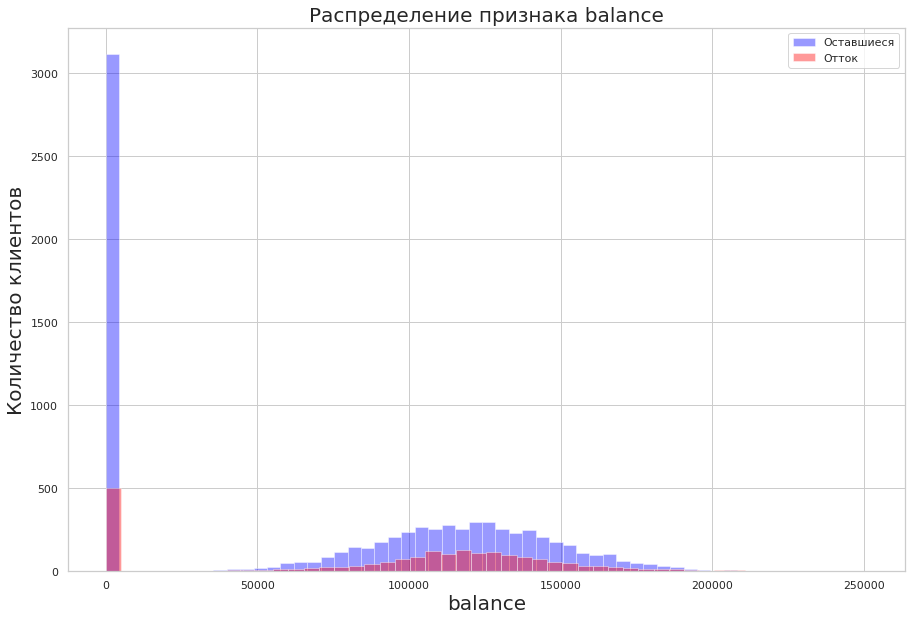

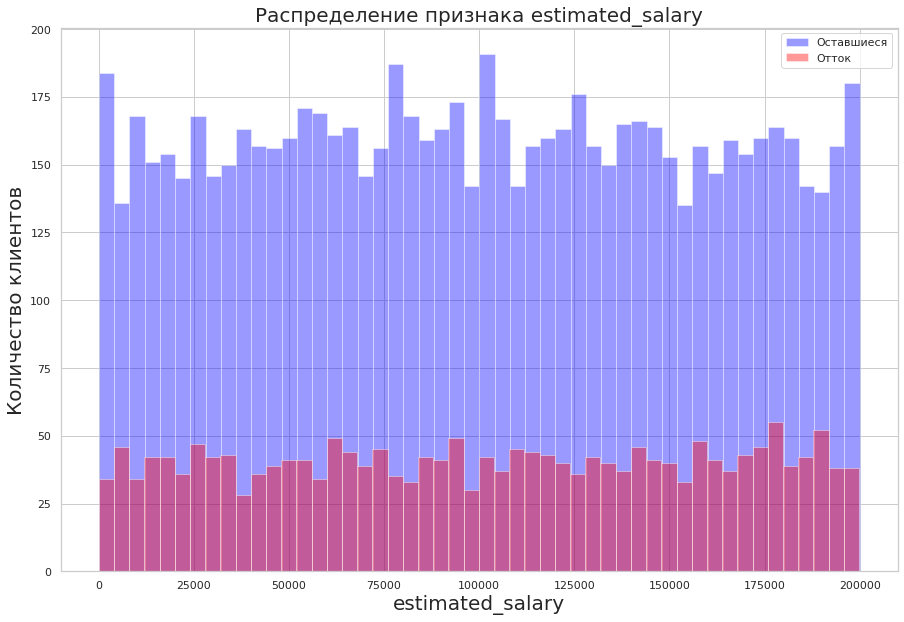

In [71]:
churn_1 = data[data['churn']==1]
churn_0 = data[data['churn']==0]
sns.set_theme(style="whitegrid")
sns.set_palette(['blue', 'red'])


for column in ['score', 'age', 'objects', 'balance', 'estimated_salary']:
    plt.figure(figsize=(15, 10))
    sns.distplot(churn_0[column], bins=50, kde=False)
    sns.distplot(churn_1[column], bins=50, kde=False)
    plt.title('Распределение признака '+column, fontsize=20)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Количество клиентов', fontsize=20)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

**Рассмотрим категориальные признаки:**

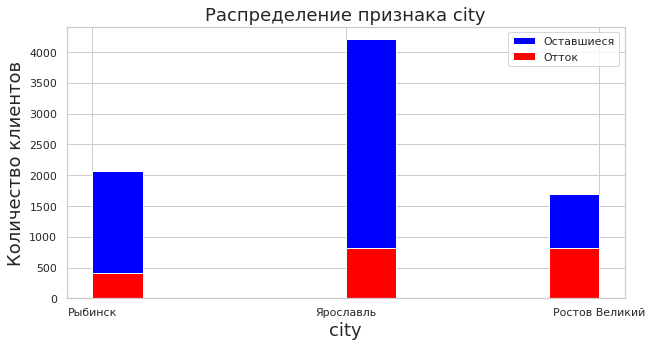

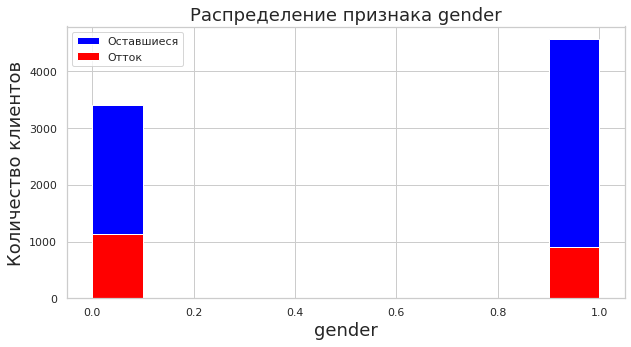

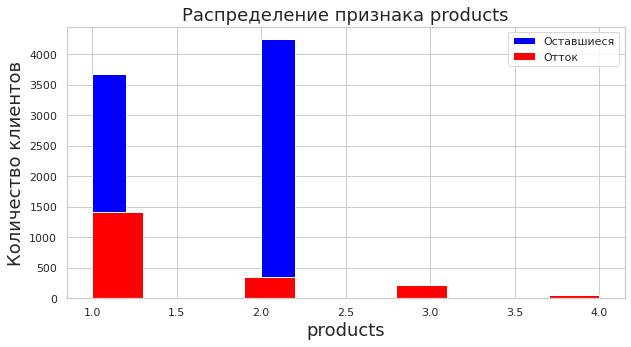

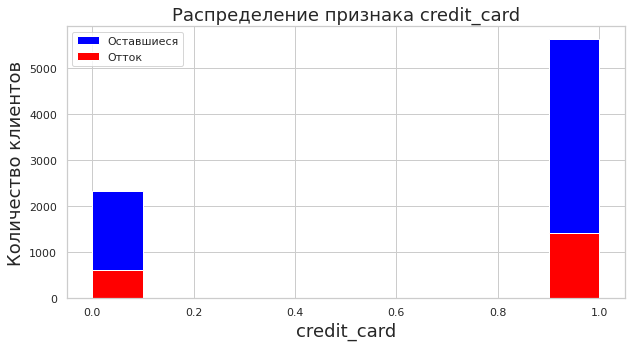

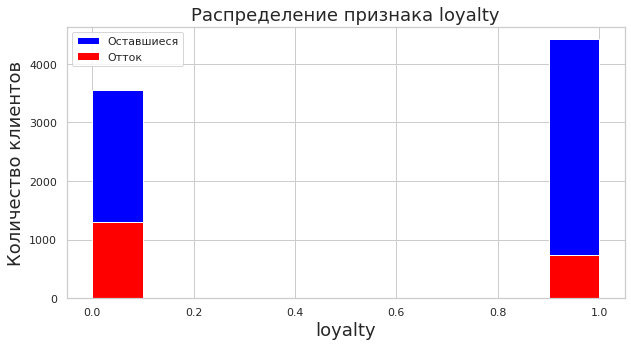

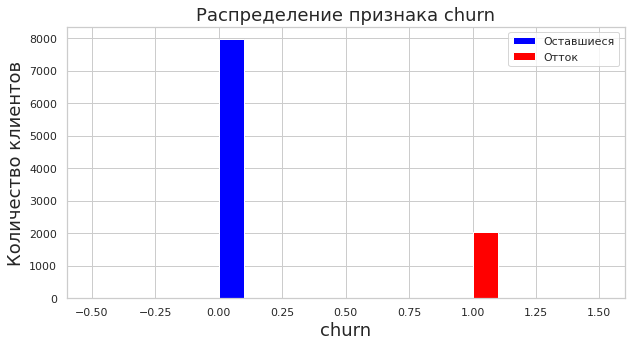

In [72]:
sns.set_theme(style="whitegrid")
sns.set_palette(['blue', 'red'])

for column in ['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn']:
    plt.figure(figsize=(10, 5))
    data.groupby('churn')[column].hist()
    plt.title('Распределение признака '+column, fontsize=18)
    plt.xlabel(column, fontsize=18)
    plt.ylabel('Количество клиентов', fontsize=18)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

**Рассмотрим категориальные признаки подробнее, построив тепловые карты:**


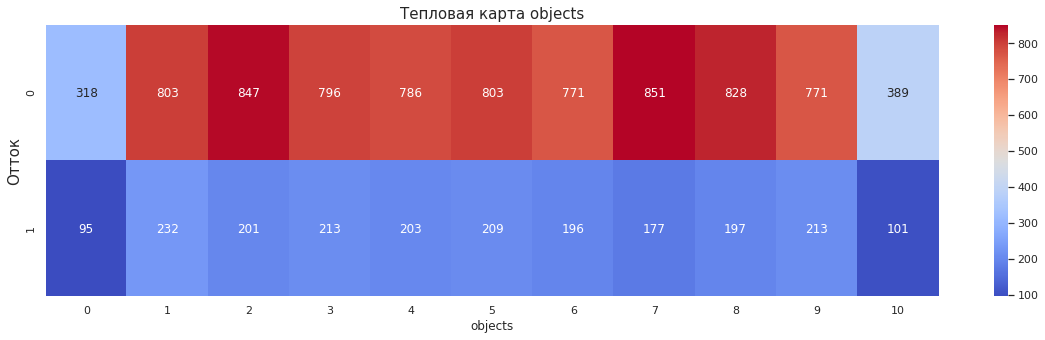

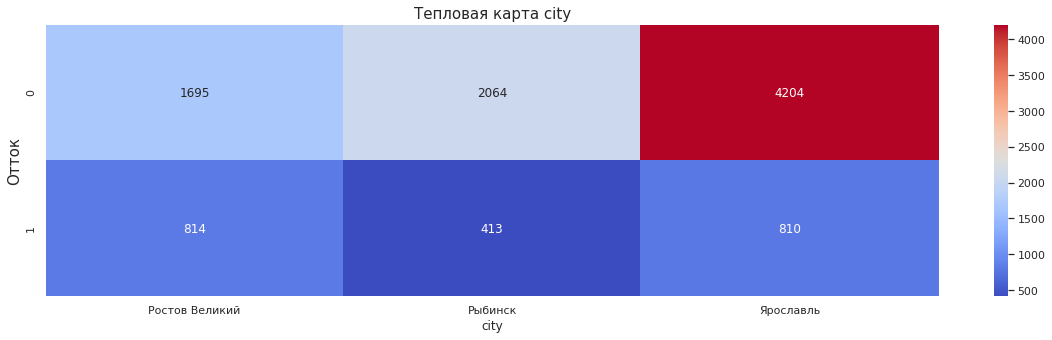

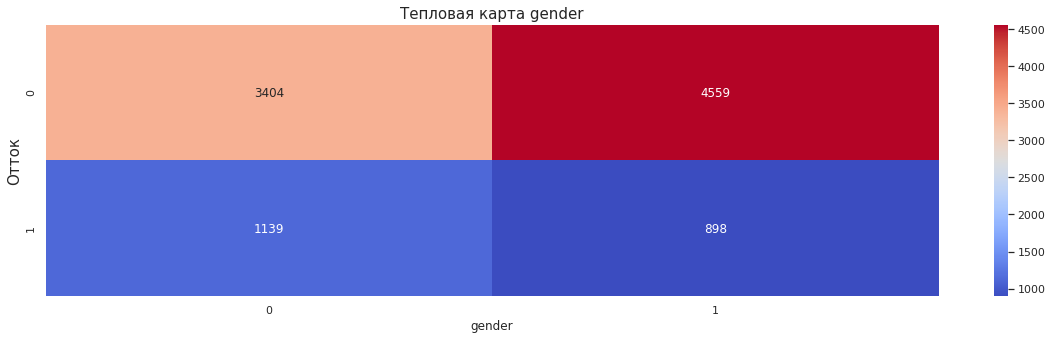

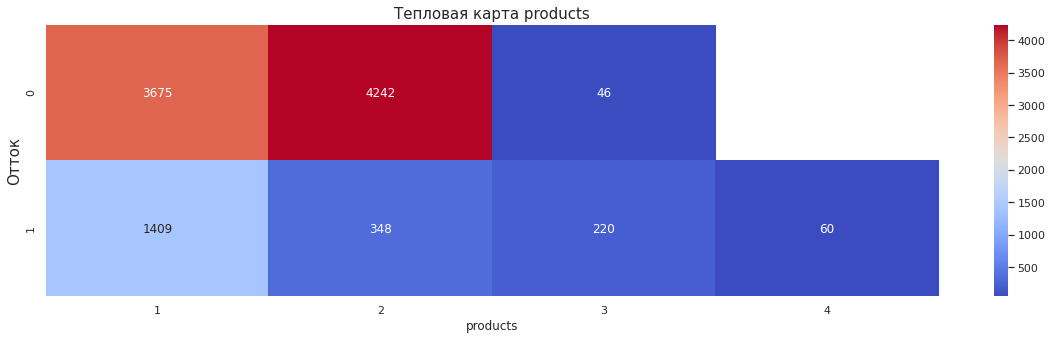

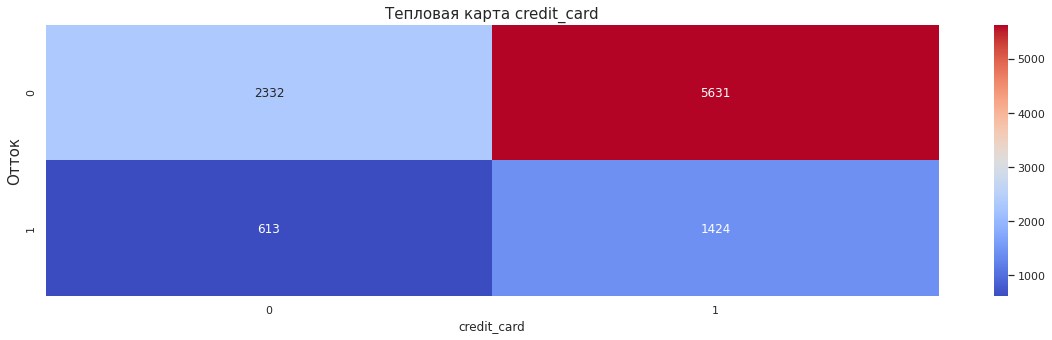

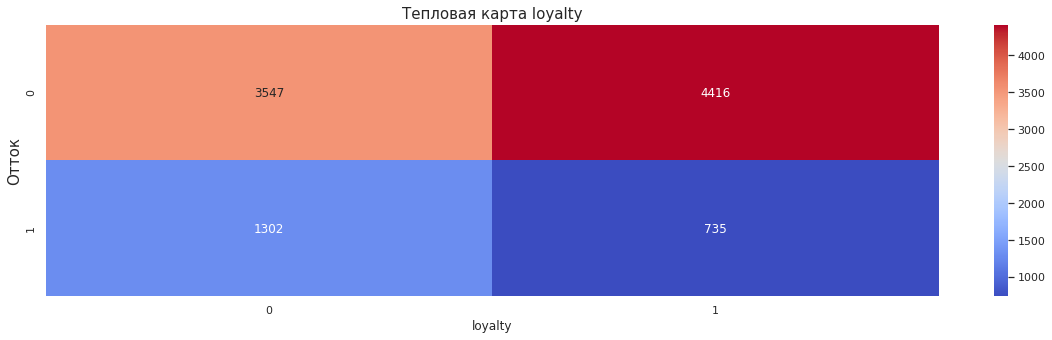

In [73]:
for column in ['objects', 'city', 'gender', 'products', 'credit_card', 'loyalty']:
    data_heatmap = data.pivot_table(
        index='churn',
        columns=column,
        values='user_id',
        aggfunc='count',
        #margins=True
    )
    plt.figure(figsize=(20, 5))
    sns.heatmap(data_heatmap, cmap='coolwarm', annot=True, fmt='.0f')
    plt.title('Тепловая карта '+column, fontsize=15)
    plt.ylabel('Отток', fontsize=15)
    plt.show()

**Вывод:**<br>
- Среди лояльных Банку клиентов минимальнй балл скоринга - 400 (при нижней границе в 300 баллов), пиковые значения - от 650 до 700; у клиентов в оттоке пиковые значения от 620 до 670, далее идет спад. Наблюдается аномальный рост количества клиентов с 850 баллами в обеих группах;<br>
- Можно сказать, что клиенты склонные к оттоку старше (примерно на 10 лет). В возрасте от 50 до 60 лет количество клиентов, склонных к оттоку, больше, чем лояльных;<br>
- Клиентов с 0 и 10 объектами в собственности меньше всего, в целом от количества объектов отток малозависим - по всем объектам процент оттока примерно 20%, самый высокий - у владельцев 1 объекта в собственности - 23%;<br>
- Распределнеи двух групп по количеству средств на остатке (баланс) практически одинаковое, если не брать в расчет клиентов с нулевым балансом(пропущенными значениями);<br>
- Зарплата распределена равномерно, нет явно выделяющихся групп зарплат - обычно при рассмотрении такого параметра как зарплата, ожидается кривая - чем больше з/п, тем меньшее количество людей;<br>
- Самые лояльные Банку клиенты проживают в Ярославле (16%), за ним следует Рыбинск(17%), более всего склонные к уходу - в Ростове Великом, 32% от всех клиентов в этом городе покинули Банк;<br>
- Женщины более склонны к уходу из Банка - 25% попало в отток, в то время как у мужчин процент оттока составляет 16%;<br>
- Самые лояльные Банку клиенты - те, кто пользуется 2 банковскими продуктами, у тех же, кто пользуется 3 продуктами - 83% оттока, а 4 продуктами - 100 % оттока;<br>
- Наличие кредитки не влияет на отток - 20-21% оттока в обеих группах;<br>
- Неактивные клиенты чаще уходят в отток - из них 27% ушли, среди активных - 14%<br>

<div class='alert alert-success'>👍
У тебя получилась весьма качественная визуализация, мне понравилось разнообразие типов графиков. Особенно круто что решил попробовать использовать тепловую карту. Также не забывай про боксплоты и графики типа виолончель. С их помощью ты сможешь более полноценно понять распределения данных. Также очень классной техникой позволяющей упростить восприятие информации является категоризация непрерывных признаков, когда разбивают на 5-10 бинов.

**3.4 Корреляционный анализ**

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,0,42,2,0.00,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,0,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,0,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,0,39,1,0.00,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,0,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,1,39,5,0.00,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,1,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,0,36,7,0.00,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,1,42,3,"75,075.31",2,1,0,"92,888.52",1


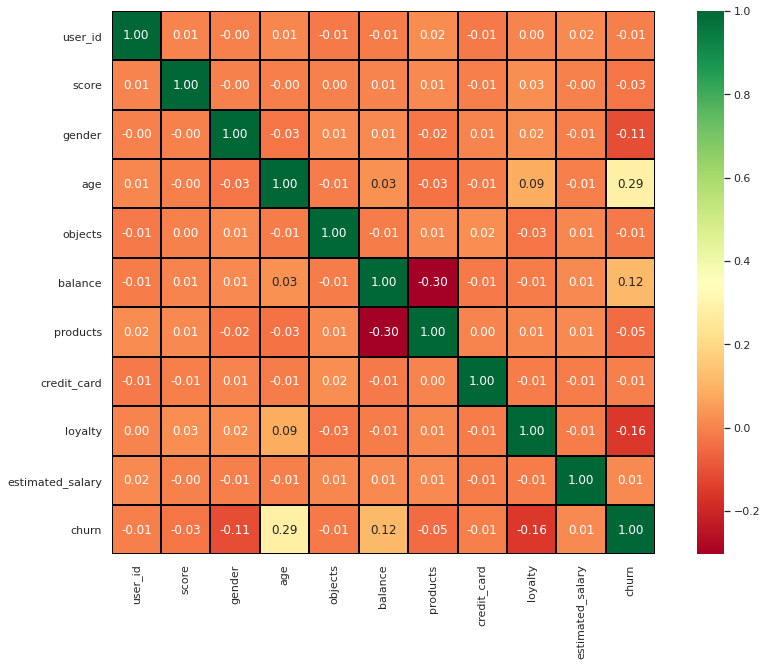

In [74]:
display(data)
corr_m = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_m, square = True, annot = True, fmt = '0.2f', cmap= 'RdYlGn', 
            linewidths=1, linecolor='black')
plt.show()

**Создадим новую таблицу City, удалив из начального датафрейма все столбцы, кроме city и churn и применим метод get_dummies:**

In [44]:
city = data.drop(columns=['user_id', 'score', 'gender', 'age', 'objects', 'products', 'balance', 'credit_card', 'loyalty', 'estimated_salary'])
city = pd.get_dummies(city)
display(city)

,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,1,0,0,1
1,0,0,1,0
2,1,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
9995,0,0,0,1
9996,0,0,0,1
9997,1,0,0,1
9998,1,1,0,0


**Построим матрицу корреляций по городам и оттоку:**

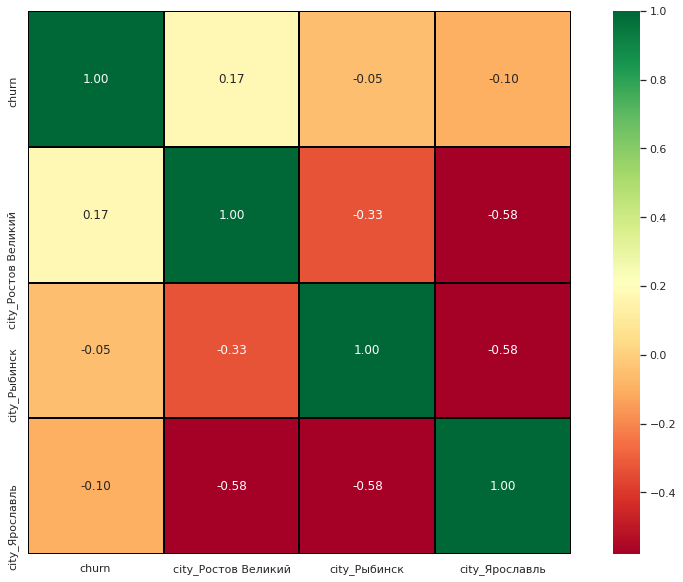

In [82]:
corr_m = city.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_m, square = True, annot = True, fmt = '0.2f', cmap= 'RdYlGn', 
            linewidths=1, linecolor='black')
plt.show()

**Вывод по матрице корреляций:**<br>
- **Нет явной зависимости оттока от какого-либо из признаков;**<br>
- Больше всего на отток влияют: Пол клиента(-0.11), Возраст(0.29), Баланс(0.12) и Активность клиента(-0.16).<br>
- Почти все остальные признаки имеют почти нулевую корреляцию, соответственно практически не влияют на отток - Баллы скоринга, Зарплата, Объекты в собственности, Количество банковских продуктов на клиента, пользутеся ли кредитной карточкой - у всех корреляция от -0.05 до 0.01.<br>
- Заметна слабая корреляция между балансом и количеством используемых продуктов(-0.30);<br>
- Из городов самая большая корреляция с оттоком у Ростова Великого (0.17), затем идут Ярославль (-0.10) и Рыбинск(-0.05)

<div class='alert alert-success'>👍
Круто что владеешь такой мощной техникой визуализации как тепловая карта. На ней прекрасно видно что особых корреляций между признаками нет. В такой ситуации стоит подумать о том, что возможно признаки имеют нелинейные связи. Для выявления таких нелинейных взаимосвязей я рекомендую дополнительно посмотреть на корреляцию Спирмена, а в идеале познакомиться с очень продвинутым коэффициентом корреляции Phik. С его помощью можно получать адекватные значения корреляции для данных любой природы. https://phik.readthedocs.io/en/latest/introduction.html


<div class='alert alert-warning'>⚠️
На мой взгляд тут не хватает исследования зависимостей по городам, для этого тебе прежде всего необходимо закодировать данный признак. С one-hot кодировкой могут получаться правильные значения корреляции, чего не скажешь о порядковой кодировке. При ordinal кодировке значения корреляции будут получаться разными при выборе другого порядка кодирования.


<span style="color:blue"> **Добавил матрицу корреляций по городам.**

### 4. Выделение портрета клиентов

**4.1 Портрет клиентов, склонных к уходу:**

- Проживают в г. Ростов Великий;<br>
- От 40 лет (старше в среднем на 7 лет (по медиане - разница в 9 лет);<br>
- Пол: женский;<br>
- Количество используемых банковских продуктов - 1, 3 или 4. Причем те, у кого 4 продукта - 100% показатель оттока;<br>
- Не активные клиенты;<br>
- Средний размер баланса - 91108,54 руб. (больше на 18363,24 руб.);<br>
- Средняя зарплата - 101465,68 руб. (выше на 1727,29 руб.)<br>

**4.1 Портрет клиентов, не склонных к уходу:**

- Проживают в г. Рыбинск и г. Ярославль;<br>
- Возраст - от 30 до 40 лет;<br>
- Пол: Мужской;<br>
- Количество используемых банковских продуктов - 2 (92% лояльных Банку клиентов);<br>
- Активные клиенты (86% лояльных клиентов);<br>
- Средний размер баланса - 72748,30 руб. (меньше на 18363,24 руб.);<br>
- Средняя зарплата - 99738,39 руб. (меньше на 1727,29 руб.)<br>

### 5. Формулировка и проверка гипотез

**5.1 Гипотеза о различии доходов между двумя группами (отток и оставшиеся клиенты)**

Построим график распределения доходов клиентов для обеих групп:

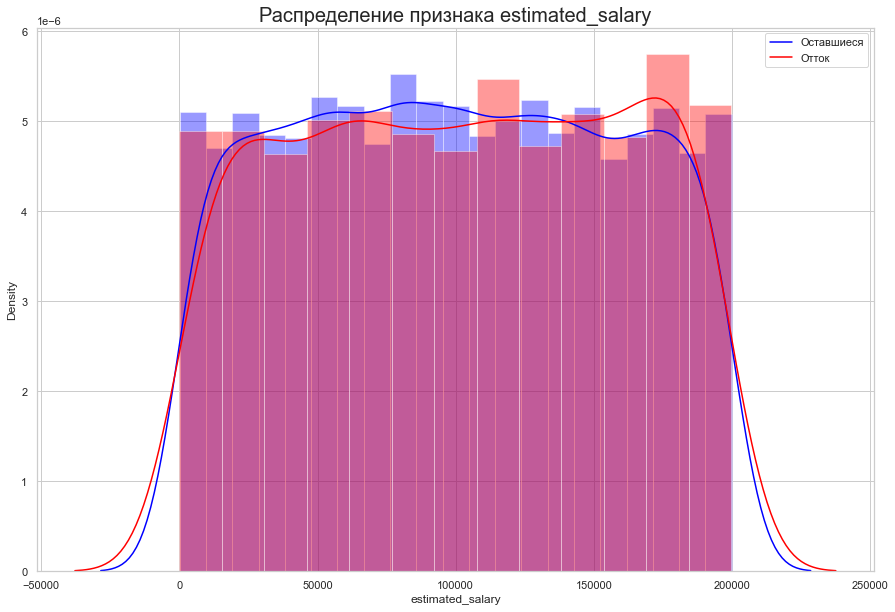

In [260]:
sns.set_theme(style="whitegrid")
sns.set_palette(['blue', 'red'])

plt.figure(figsize=(15, 10))
sns.distplot(churn_0['estimated_salary'],label='1')
sns.distplot(churn_1['estimated_salary'],label='0')
plt.title('Распределение признака '+column, fontsize=20)
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

Распределение приближено к нормальному. Проверим гипотезу о различии доходов между двумя группами (отток и оставшиеся клиенты) при помощи U-критерия Манна-Уитни.

**Сформулируем гипотезы:**<br>
1. **Нулевая гипотеза:** Между двумя группами (отток и оставшиеся клиенты) нет статистически значимых различий в доходах<br>
2. **Обратная гипотеза:** Между двумя группами (отток и оставшиеся клиенты) есть статистически значимые различия в доходах<br>

In [274]:
alpha = 0.05

pvalue = st.mannwhitneyu(churn_0['estimated_salary'], churn_1['estimated_salary']).pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: Между двумя группами (отток и оставшиеся клиенты) есть статистически значимые различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу:  Между двумя группами (отток и оставшиеся клиенты) нет статистически значимых различий")

p-значение:  0.22705150930153783
Не получилось отвергнуть нулевую гипотезу:  Между двумя группами (отток и оставшиеся клиенты) нет статистически значимых различий


**Вывод:** <br>
Ничего нового по отношению к выводам из предыдущих этапов анализа мы не узнали - нулевую гипотезу о том, что между двумя группами (отток и оставшиеся клиенты) нет статистически значимых различий в доходах, отвергнуть не удалось.

**5.2 Гипотеза о различии в возрасте между двумя группами (отток и оставшиеся клиенты)**

Построим график распределения возраста клиентов для обеих групп:

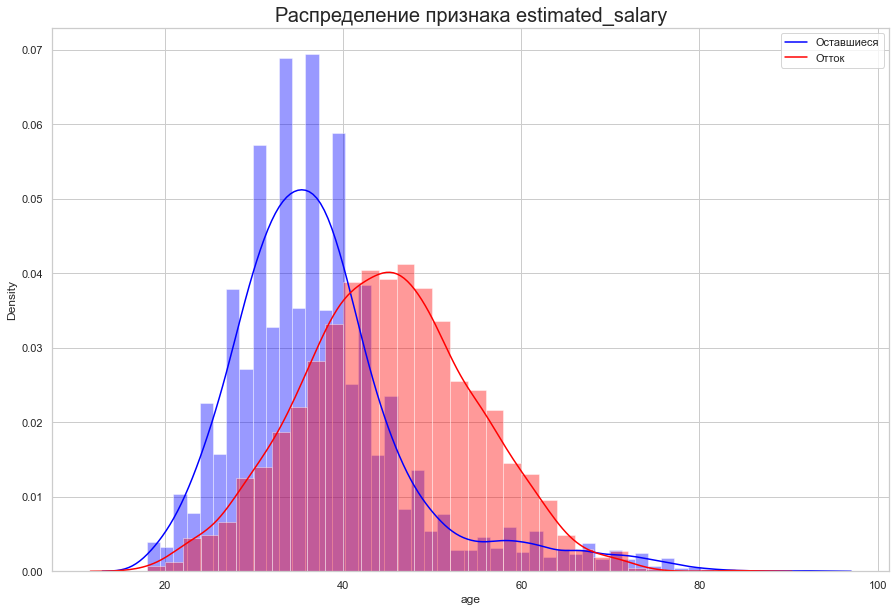

In [275]:
sns.set_theme(style="whitegrid")
sns.set_palette(['blue', 'red'])

plt.figure(figsize=(15, 10))
sns.distplot(churn_0['age'],label='1')
sns.distplot(churn_1['age'],label='0')
plt.title('Распределение признака '+column, fontsize=20)
plt.legend(['Оставшиеся', 'Отток'])
plt.show()

Наблюдается положительный перекос в распределении среди оставшихся - клиенты в возрасте старше 60 лет. Проверим гипотезу о различии в возрасте между двумя группами (отток и оставшиеся клиенты) также при помощи U-критерия Манна-Уитни:

In [277]:
alpha = 0.05

pvalue = st.mannwhitneyu(churn_0['age'], churn_1['age']).pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: Между двумя группами (отток и оставшиеся клиенты) есть статистически значимые различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу:  Между двумя группами (отток и оставшиеся клиенты) нет статистически значимых различий")

p-значение:  3.2104014319371675e-230
Отвергаем нулевую гипотезу: Между двумя группами (отток и оставшиеся клиенты) есть статистически значимые различия


**Вывод:**<br>
Отвергаем нулевую гипотезу: Между двумя группами (отток и оставшиеся клиенты) есть статистически значимые различия в возрасте, что подтверждается в п. 3.2 настоящей работы, где: <br>
- Средний возраст клиентов в оттоке - 44.84 года, медианный - 45 лет;<br>
- Средний возраст оставшихся клиентов - 37.41 лет, медианный - 36 лет<br>

<div class='alert alert-success'>👍
Отличная работа в разделе с проверкой гипотез, выглядит очень профессионально. Мне понравилось как ты сначала посмотрел на распределение данных и затем только выбрал подходящий стат критерий. 

### 6. Общие выводы и рекомендации

### ВЫВОД:<br>

Датасет состоит из 10000 строк - каждая строка это уникальный клиент.<br>
Типы данных корректны, заменять ничего не пришлось.<br>
В столбце Balance (остаток денежных средств на счете) 3617 пропусков (NaN) - что составляет 36,17 % от общего числа.<br>
<br>
**В результате предобработки данных было сделано следующее:**<br>
<br>
- привели названия столбцов к нижнему регистру;<br>
- скорректировали названия столбцов;<br>
- дубликатов не обнаружено;<br>
- все данные, за исключением отсутствия нулевого баланса и необычайно низкой заработной платы являются нормальными;
- заменили пропуски в столбце Balance на "0" - на основании предположения о том, что это ошибка при выгрузке из БД, которая подразумевает нулевой остаток на балансе, либо использвание клиентами только кредитных продуктов Банка<br>
<br>

**На основании исследовательского анализа данных выявили портреты клиентов:**<br>
<br>

Портрет клиентов, ***склонных*** к уходу:<br>
<br>
- Проживают в г. Ростов Великий;<br>
- От 40 лет (старше в среднем на 7 лет (по медиане - разница в 9 лет);<br>
- Пол: женский;<br>
- Количество используемых банковских продуктов - 1, 3 или 4. Причем те, у кого 4 продукта - 100% показатель оттока;<br>
- Не активные клиенты;<br>
- Средний размер баланса - 91108,54 руб. (больше на 18363,24 руб.);<br>
- Средняя зарплата - 101465,68 руб. (выше на 1727,29 руб.)<br>
<br>

Портрет клиентов, ***не склонных*** к уходу:<br>
<br>
- Проживают в г. Рыбинск и г. Ярославль;<br>
- Возраст - от 30 до 40 лет;<br>
- Пол: Мужской;<br>
- Количество используемых банковских продуктов - 2 (92% лояльных Банку клиентов);<br>
- Активные клиенты (86% лояльных клиентов);<br>
- Средний размер баланса - 72748,30 руб. (меньше на 18363,24 руб.);<br>
- Средняя зарплата - 99738,39 руб. (меньше на 1727,29 руб.)<br>
<br>

**Сформулировано две гипотезы:**<br>
<br>
- ***Гипотеза №1*** - о различии доходов между двумя группами (отток и оставшиеся клиенты)<br>
- ***Гипотеза №2*** - о различии в возрасте между двумя группами (отток и оставшиеся клиенты)<br>
<br>

Результат проверки **Гипотезы №1**: <br>
При проверке гипотезы ничего нового по отношению к выводам из предыдущих этапов анализа мы не узнали - нулевую гипотезу о том, что между двумя группами (отток и оставшиеся клиенты) нет статистически значимых различий в доходах, **отвергнуть не удалось.**<br>
<br>
Результат проверки **Гипотезы №2**: <br>
**Отвергли нулевую гипотезу** - между двумя группами (отток и оставшиеся клиенты) есть статистически значимые различия в возрасте, что подтверждается в п. 3.2 настоящей работы, где:<br>
Средний возраст клиентов в оттоке - 44.84 года, медианный - 45 лет;<br>
Средний возраст оставшихся клиентов - 37.41 лет, медианный - 36 лет<br>

### Рекомендации:

1. Уточнить корректность и принцип выгрузки данных - вопросы вызывают данные о подозрительно низких зарплатах и пропусках в столбце баланса;<Br>

2. Разработка новых продуктов в г. Ростов Великий для возврата клиентов в оттоке и привлечения новых, в том числе работа с коммерческими структурами - предоставление кредитов, ипотеки, зарплатные проекты, льготные периоды в обслуживании дебетовых и кредитных карт и т.п. Разработать новые маркетинговые акции для привлечения клиентов, пересмотр действующих и запуск новых рекламных кампаний в городе.<Br> 
    
3. Необходимо придумать акции для женщин - например, программы скидок и кешбэка для популярных среди женщин магазинов (сети магазинов косметики и парфюмерии, салоны красоты, косметологические клиники и т.п.). Таким образом можно внедрить акции для удержания женщин, без разделения по гендерному признаку.<Br>
    
4. Приоритизация работы с клиентами старше 40 лет;<Br>
    
5. Улучшение условий обслуживания для клиентов с бОльшим количеством используемых продуктов - подарки, бонусы, возможности отсрочки платежей без последствий и т.д.<Br>
    
6. Проанализировать работу филиалов и дополнительных офисов в Ростове Великом, в том числе качество и скорость обслуживания физлиц, факты закрытия филиалов, количество и удобность месторасположения терминалов и банкоматов - в этом городе каждый третий клиент уходит в отток;<Br>

7. Провести анализ конкурентов в г. Ростов Великий - возможно, отток связан с миграцией клиентов в конкурирующий банк;<Br>

8. Разработать план мероприятий, нацеленных на своевременную профилактику и предотвращение оттока клиентов из банка;<Br>

5. Разработать акции, повышающие активность среди клиентов - стимулирование расчетов физическими лицами безналичным способом с помощью программ кэшбэка, призовых и бонусов на основании частоты использования банковскими продуктами и т.д.;<Br>

<div class='alert alert-warning'>⚠️
Нужно сфокусироваться не на том что провести еще какую-то дополнительную аналитику, а на том какие конкретные действия можно сделать на основании тех данных которые ты имеешь. Заказчик ожидает что ты сформируешь конкретные предложения по работе с различными сегментами оттока предложив им продукт который сможет их удержать. Среди банковских продуктов могут быть: дебетовые и кредитные карты, кредит наличными и ипотека, накопительные и нвестиционные счета, сейфовые ячейки, кеш бек системы.


<span style="color:blue"> **Дополнил выводы**